import libraries

In [3]:
import os
from maps import *
import numpy as np
from dtocs import *
from helper import *
from rasterData import *
import matplotlib.pyplot as plt



# Split the data

In [4]:
par_dir = '/Users/aakash/Desktop/MTP2/code'

map_data_tif_path = par_dir + '/data/merged_file_w_roads.tif'
output_data_dir = par_dir + '/data/tile_data_roads'

tile_size = 512
SPLIT_DATA = False


if(SPLIT_DATA):
    split_tif_into_tiles(map_data_tif_path, output_data_dir, tile_size)

# Merge According to bounding box

In [11]:
merged_data_path  = par_dir + '/data/temp/file.tif'
# outfile = par_dir + '/data/temp/file2.tif'
# manali (hanuman tibba - manali)
lon1, lat1 = 76.95459234317525,31.801679137058297
lon2, lat2 = 77.02411520084127,31.764177519360725

bounding_box = (lon1, lat2, lon2, lat1)
# bounding_box = (76.98328796870653,31.70144173323603, 77.01350037105028,31.737946830245892)

mergeFiles(output_data_dir, merged_data_path, bounding_box)

# cropBoundingBox(merged_data_path,outfile, bounding_box)
# merged_data_path = outfile
# merge_dem_files(elevation_split_dir, merged_elevation_path, bounding_box)
# merge_dem_files(landcover_split_dir, merged_landcover_path, bounding_box)

resolution = 30

2 files merged


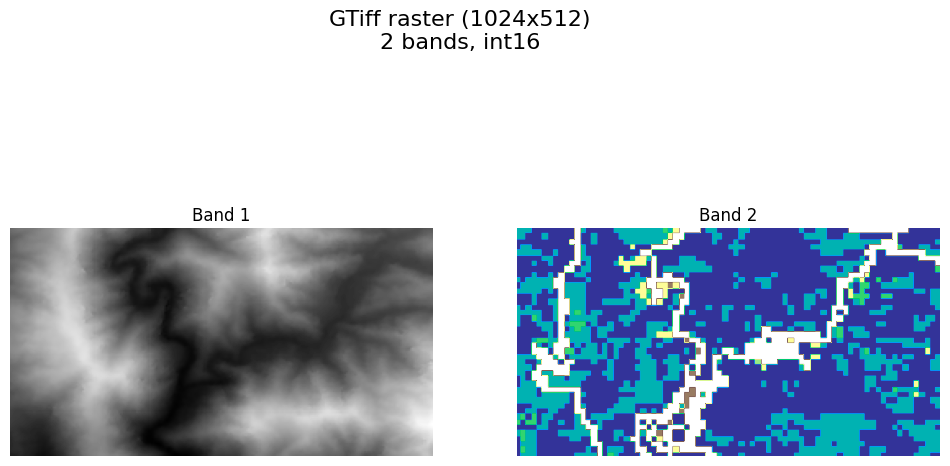

In [12]:
bbox = bounding_box
plot_multiband_raster(merged_data_path,bbox)

# Generate Matrix
- Using GDAL tile interface

In [16]:
map_data,bounds,tf = getDataBoundingBox(merged_data_path, bounding_box)

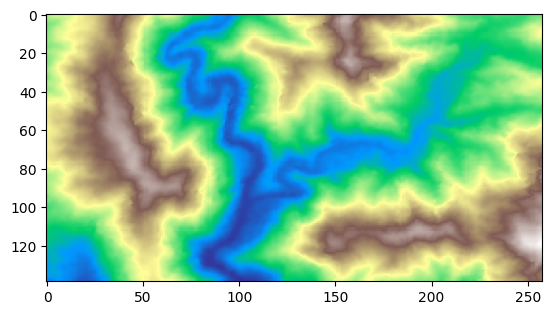

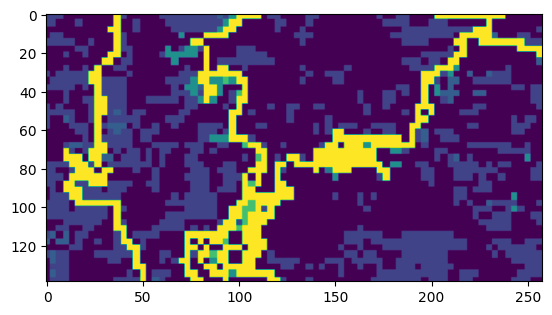

(2, 139, 258)
Elevation Map Info
Gray Map Shape: (139, 258)
Min: 946
Max: 1780


In [19]:
plt.imshow(map_data[0],cmap='terrain')
plt.show()
plt.imshow(map_data[1])
plt.show()
print(map_data.shape)

print("Elevation Map Info")
print(f"Gray Map Shape: {map_data[0].shape}")
print(f"Min: {map_data[0].min()}")
print(f"Max: {map_data[0].max()}")

Source and Destination

In [36]:

# USA random
# src_lon,src_lat = -109.81884898177093,44.32480359458633
# des_lon,des_lat = -109.77537406272984,44.30294042398075

# src_lat, src_lon = 38.98065379328955, -106.528761396495
# des_lat, des_lon = 39.02089538747208, -106.42163602957328

# src_lat, src_lon = 32.243724, 77.204016
# src_lat, src_lon = 32.350336, 77.129226

# hanuman tibba
# src_lat, src_lon = 32.216951, 77.231191
# des_lat, des_lon = 32.341876, 77.040854

# src_lat, src_lon = 31.775167, 77.017773
# des_lat, des_lon = 31.772527, 77.029848

# palan
# src_lat, src_lon = 32.369789, 76.766289
# des_lat, des_lon = 32.076790, 77.312516

# menthosa - sosan
# src_lat, src_lon = 32.80644936709285, 76.82298402202355
# des_lat, des_lon = 32.29517226314917, 77.4885503853536


# src_lat, src_lon = 31.733824874811024, 77.00073130455512
# des_lat, des_lon = 31.726524680775725, 77.00802691307562

# src_lat, src_lon = 31.794790544810002, 76.99715247898794
# des_lat, des_lon = 31.776113205607807, 76.98354831486441

src_lat, src_lon = 31.794790544810002, 76.99715247898794
des_lat, des_lon = 31.776113205607807, 76.98354831486441


src_latIdx,src_lonIdx = findIndexFromCoordinate(bounding_box, map_data[0], src_lon, src_lat)
des_latIdx,des_lonIdx = findIndexFromCoordinate(bounding_box, map_data[0], des_lon, des_lat)


In [37]:
print(src_latIdx,src_lonIdx)
print(des_latIdx,des_lonIdx)


25 157
94 107


A* Search Algorithm

In [38]:
from astar import astarFromSrcWholeBB, astarFromSrcTillDes, showPathAstar

- Whole bounding box

In [39]:
alpha = 0
h_weight = 0.1
slope = 40
distFromSrc, parentMat  = astarFromSrcWholeBB(map_data[0], map_data[1], src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope)

- Till destination break point

In [40]:
alpha = 0
h_weight = 0.1
slope = 40
distFromSrc, parentMat  = astarFromSrcTillDes(map_data[0], map_data[1], src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope)

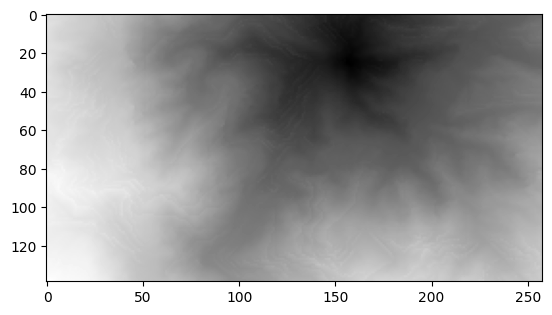

In [34]:
plt.imshow(distFromSrc,cmap='gray')
plt.show()

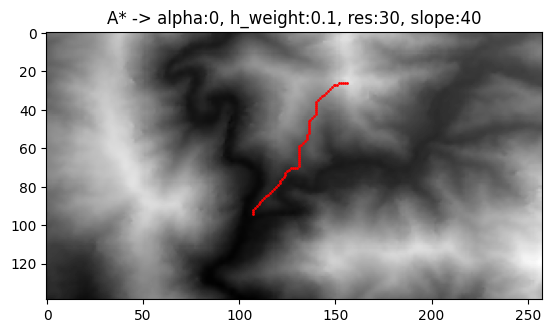

In [35]:
showPathAstar(map_data[0], parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx, alpha, h_weight, resolution, slope)